In [20]:
!pip install symbulate
from symbulate import *

import random
import numpy as np

import matplotlib.pyplot as plt
# 

## **Discrete and Contnuous Joint PDF**
Joint probability is the probability of two events occurring simultaneously.

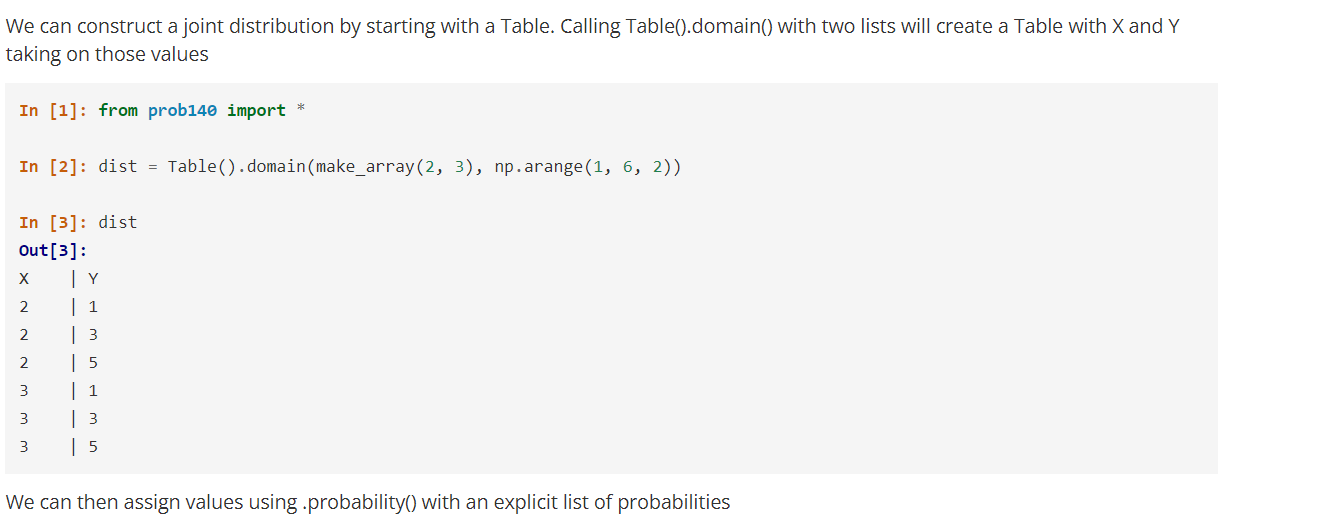

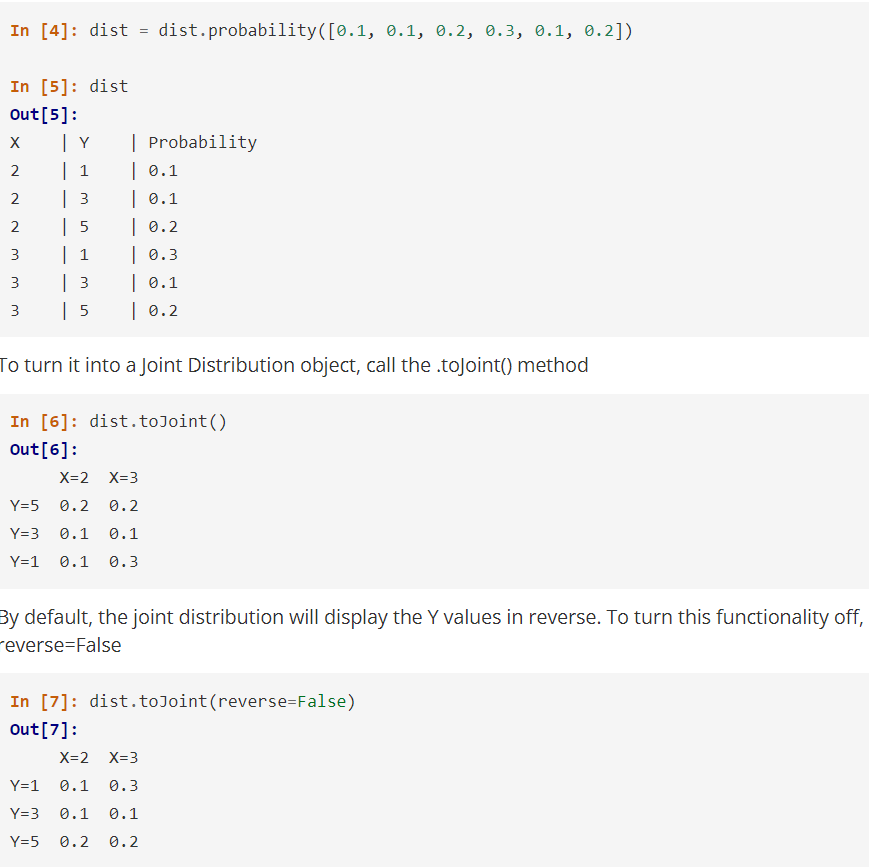

## Continuos Joint PDF

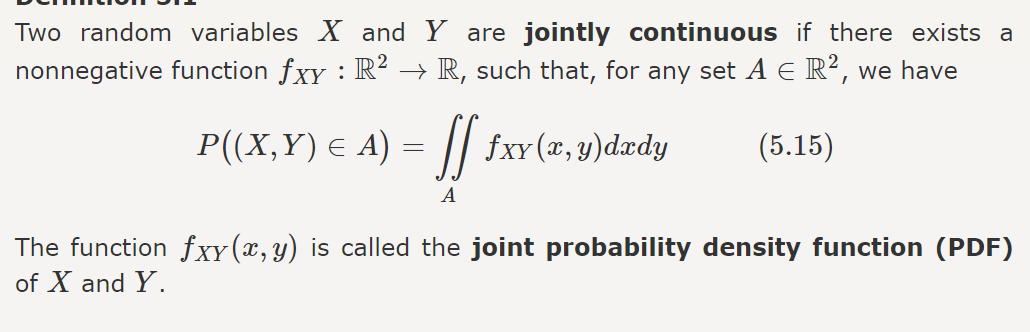

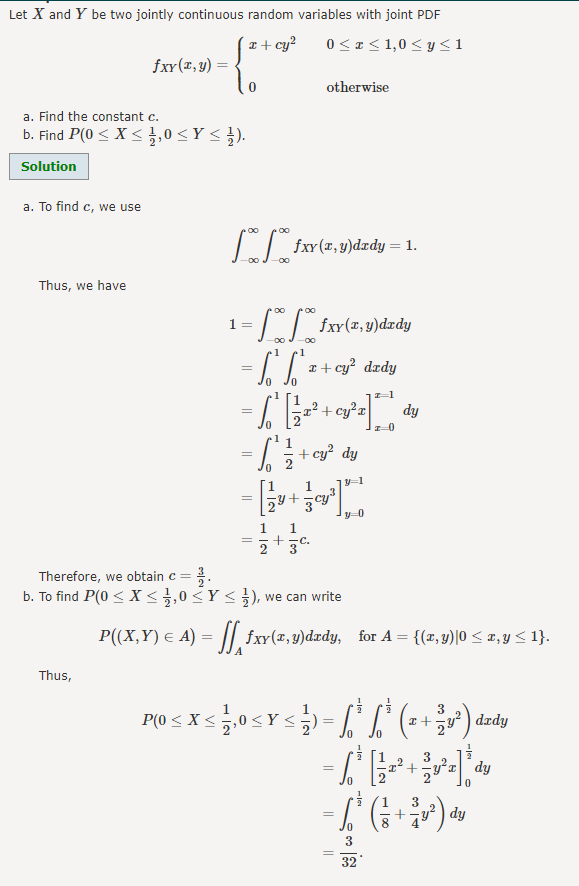

## **Condition Probability**
Conditional probability is the probability of one event occurring in the presence of a second event.

the mathematical notation we need.  P(x=x)  is the probability that the variable  x  takes the state  x . For instance,  P(x=3)  corresponds to the probability of rolling a 3 on a dice. In a similar way,  P(y=y)  is the probability that the random variable  y  take the value  y . 
For instance,  
P(y=′heads′)  corresponds to the probability of getting a 'head'.

**P(y=y,x=x)**  is the joint probability of these events. For instance,  P(x=3,y=′heads′)  is the probability of rolling a 3 on a dice and getting a 'heads' on a coin. For this example, let's say that we know that  

**P(x=3,y=′heads′)=112 .**

**P(y=y|x=x)**  corresponds to the probability that  y=y  given that  x=x . This is thus a conditional probability. For instance,  P(y=′heads′|x=3)  corresponds to the probability of getting a 'head' given that we already roll a 3 on the dice.

Note that  **P(y=′heads′|x=3)=P(y=′heads′)**  because these events are independent. This means that the probability of  x  is the same for any outcome of  y .

In our example, we have:

**P(y=′heads′|x=3)=P(y=′heads′,x=3)P(x=3)=11216=612=0.5**

**We can see that indeed  P(y=′heads′|x=3)=P(y=′heads′)=0.5**

In [16]:
# Example :

import enum, random
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1
def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)

for _ in range(10):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1
print("P(both | older):", both_girls / older_girl)   # 0.5007089325501317
print("P(both | either):", both_girls / either_girl) # 0.3311897106109325

## **Conditional Mean | Conditional Variance**

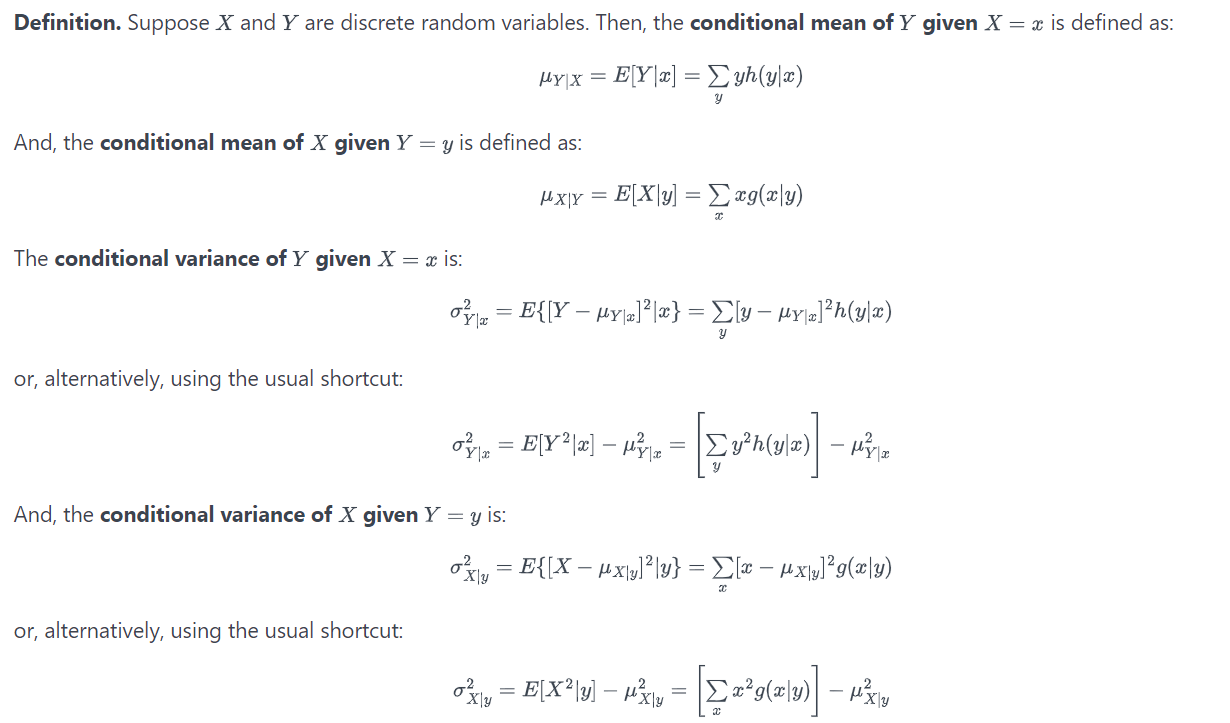

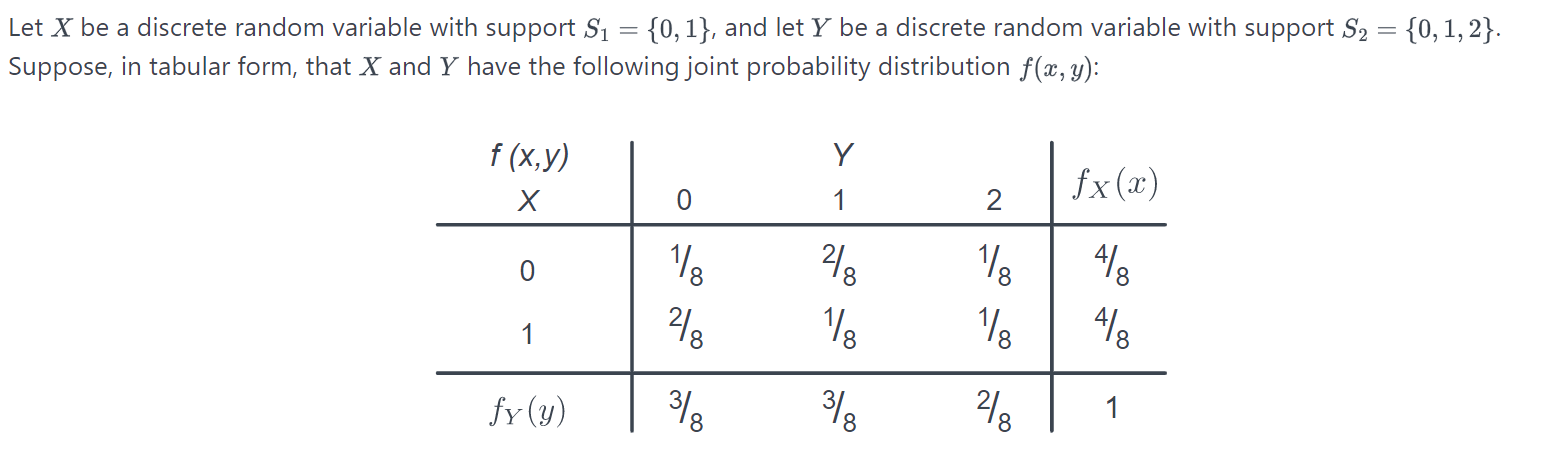


# Conditional variance of  X given X = 0 ?

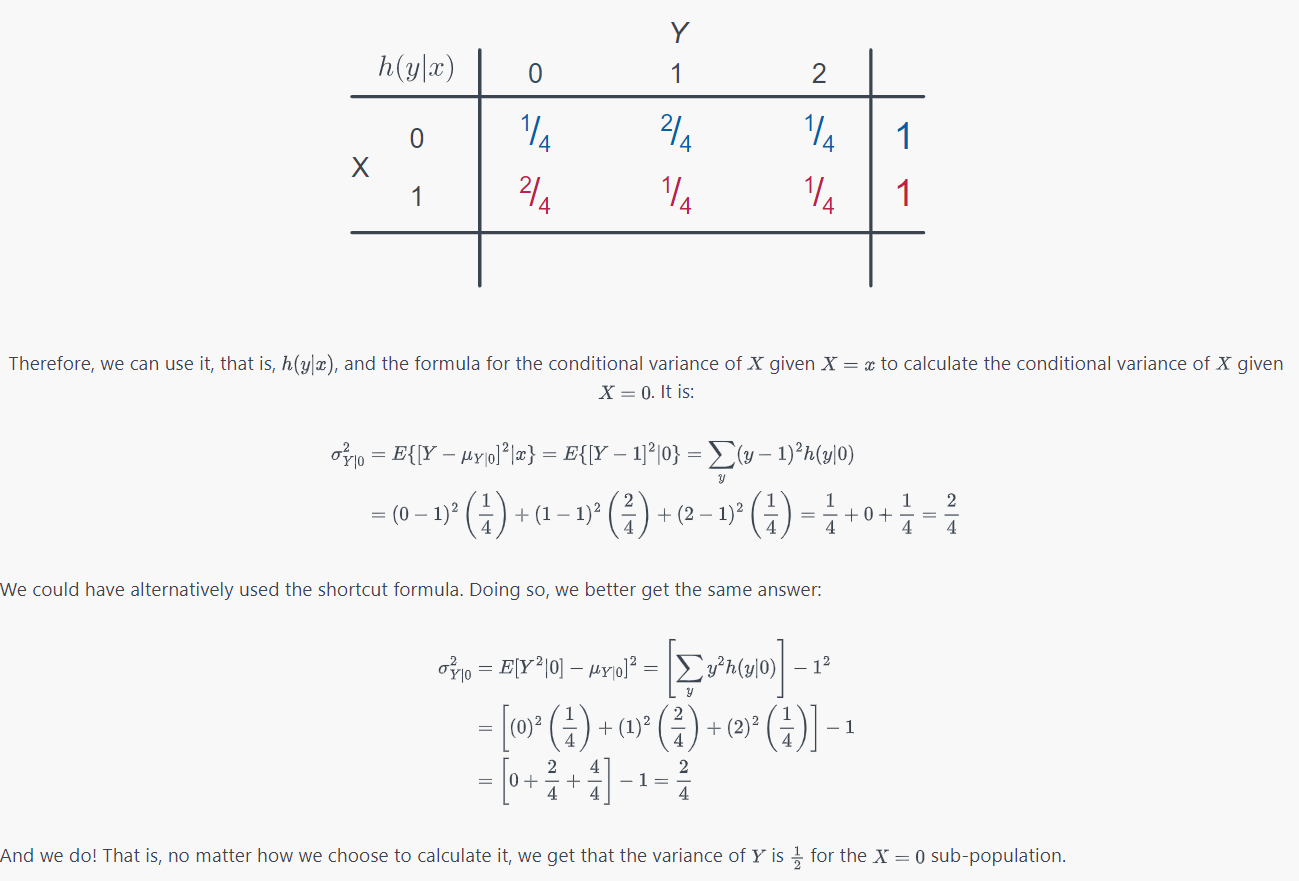


## **Marginal Distribution**
Marginal probability is the probability of an event irrespective of the outcome of another variable.

In [21]:
from scipy.stats.contingency import margins

join_probability_X_Y = np.array([
                [0.01, 0.02, 0.04, 0.04],
                [0.03, 0.24, 0.15, 0.06],
                [0.04, 0.10, 0.08, 0.08],
                [0.02, 0.04, 0.03, 0.02]
            ])


x, y = margins(join_probability_X_Y)

print(x.T)

[[0.11 0.48 0.3  0.11]]


## **Co-Variance | Correlation**

The covariance between random variables  X  and  Y , defined as
Cov(X,Y)=E[(X−E(X))(Y−E(Y))],
 
measures the degree of linear dependence between  X  and  Y . Covariance can be approximated by simulating many pairs of values of the random variables and using .cov().

Example. Let  X  be the minimum and  Y  the maximum of two independent Uniform(0,1) random variables. It can be shown that  Cov(X,Y)=1/36  (and the correlation is 1/2).


In [23]:
P = Uniform(a=0, b=1) ** 2
X = RV(P, min)
Y = RV(P, max)
xy = (X & Y).sim(10000)
plot(xy, alpha = 0.01)
xy.cov()

0.028055952875420374

The correlation coefficient is a standardized measure of linear dependence which takes values in  [−1,1] 

The correlation coefficient can be approximated by simulating many pairs of values and using .corr().

In [24]:
X, Y = RV(BivariateNormal(mean1=0, mean2=1, sd1=1, sd2=2, corr=-0.25 ))
xy = (X & Y).sim(10000)
xy.corr()


-0.2419846858007604